In [1]:
from sklearn.externals import joblib # to save model

from P300.data import load_data

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


import matplotlib.pyplot as plt
%matplotlib inline 


%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
# load classifier 
subject='B'
num_ch=64
clf_filename="{}_LR_ch{}.model".format(subject,num_ch)
clf = joblib.load(clf_filename)
print(clf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [3]:
# calc prob for test 
subject = 'A'
#X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject, 'test', 100)

loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [4]:
# test
Y_est=clf.predict(X_test)

accuracy = sum(Y_test==Y_est) / len(Y_test)
print(accuracy)

metrics.confusion_matrix(Y_test,Y_est,labels=(1,-1))

0.6635555555555556


array([[ 1167,  1833],
       [ 4223, 10777]])

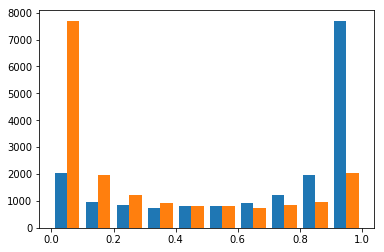

In [5]:

# predict prob
prob = clf.predict_proba(X_test)
plt.hist(prob)

log_prob = clf.predict_log_proba(X_test)
#plt.hist(log_prob)

In [6]:
np.max(log_prob)

-4.884981308350701e-15

In [7]:
prob.shape

(18000, 2)

In [8]:
X_test.shape

(18000, 896)

In [9]:
log_prob.shape

(18000, 2)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.0000e+00, 3.1000e+01, 1.5600e+02, 9.7100e+02, 1.6833e+04]),
 array([-3.29526109e+01, -2.96573498e+01, -2.63620887e+01, -2.30668277e+01,
        -1.97715666e+01, -1.64763055e+01, -1.31810444e+01, -9.88578328e+00,
        -6.59052219e+00, -3.29526109e+00, -4.45541382e-11]),
 <a list of 10 Patch objects>)

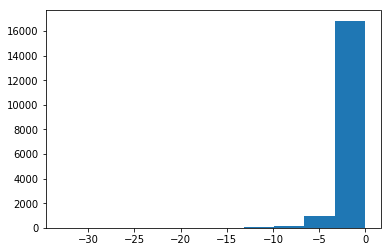

In [10]:
plt.hist(log_prob[:,0])

(array([2.000e+00, 4.200e+01, 1.044e+03, 9.158e+03, 7.182e+03, 5.360e+02,
        3.500e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-23.83431513, -18.15562252, -12.47692991,  -6.79823731,
         -1.1195447 ,   4.5591479 ,  10.23784051,  15.91653312,
         21.59522572,  27.27391833,  32.95261094]),
 <a list of 10 Patch objects>)

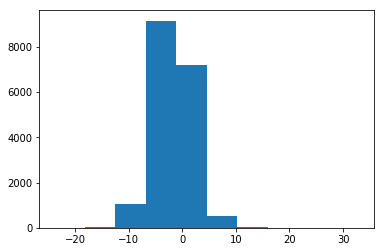

In [11]:
plt.hist(log_prob[:,1]-log_prob[:,0])

## decode after averaging over trials

In [12]:
from P300.data import sort_by_code

XX, YY, CC= sort_by_code(X_test, Y_test, Code_test)

In [13]:
print(XX.shape)
print(YY.shape)
print(CC.shape)

(18000, 896)
(18000, 1)
(18000, 1)


In [14]:
#Yest=clf.predict(XX)
#clf.score(XX, YY)
log_prob = clf.predict_log_proba(XX)
log_prob=log_prob.reshape(-1,15,12,2)
log_prob.shape

(100, 15, 12, 2)

In [15]:
# accumulate log_prob over trials
log_prob_diff=np.sum(log_prob,axis=1)[:,:,1]-np.sum(log_prob,axis=1)[:,:,0]
log_prob_diff.shape

(100, 12)

In [16]:
YY = YY.reshape(-1,15,12)
YY.shape
#YY[1,:,1]
YY_trial=YY[:,0,:]
YY_trial.shape

(100, 12)

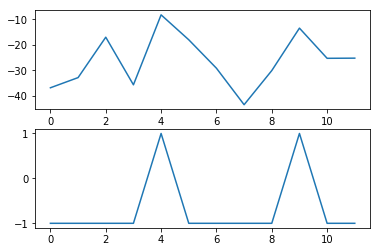

In [17]:
epoch = 0
plt.subplot(211)
plt.plot(log_prob_diff[epoch,:])
plt.subplot(212)
plt.plot(YY_trial[epoch,:])

In [18]:
np.sum(log_prob_diff > 0 , axis=1)

array([0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 3, 1, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0])

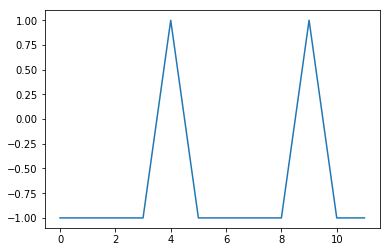

In [19]:
from P300.data import decode_rc

decoded = decode_rc(log_prob_diff)
decoded.shape
plt.plot(decoded[epoch,:])

In [20]:
from P300.data import calc_accuracy_rc

calc_accuracy_rc(YY_trial, decoded)

0.26